<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2022_2023/Practiques/Practica3_VarianzaMinima_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3: Varianza mínima**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr3_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr3_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>

**Objectivo de la práctica** 

En el reciente examen vimos esta distribución (donde hemos fijado $\theta=0.5$):

$$
f(x) = 0.5(1+\frac{x}{2}) \text{, con -1<x<1}
$$


Vamos a usar el método de transformación para transformar números aleatorios entre [0,1] para que sigan esta distribución determinada. 

La función cumulativa es la integral de $f(x)$, que si lo dejamos en función de $x$ nos queda de forma analítica:

$$
    F(x) = \frac{x^2}{8}+\frac{x}{2}+\frac{3}{8} \text{, con -1<x<1}
$$

Para usar el método de transformación. Sea $u = F(x)$, si invertimos F(x), obtenemos:

$$
  x = \sqrt{8u + 1} -2
$$

Si $u$ está uniformemente distribuida entre 0 y 1, entonces $x$ estará distribuida de acuerdo con $f(x)$ entre -1 y 1. 

Usaremos el método de transformación para ver que si construimos un estimador de $\hat{\theta} = 3\bar{x}$, donde $\bar{x}$ es la media aritmética de un conjunto de valores ${X_1, ..., X_n}$, veremos que si crece $n$ la varianza del estimador tiende a cero, como vimos en el examen!
<hr>

### <font color='orange'>**> Python #1**</font>

Realiza primero las gráficas de f(x) y F(x): **[3 punts]**

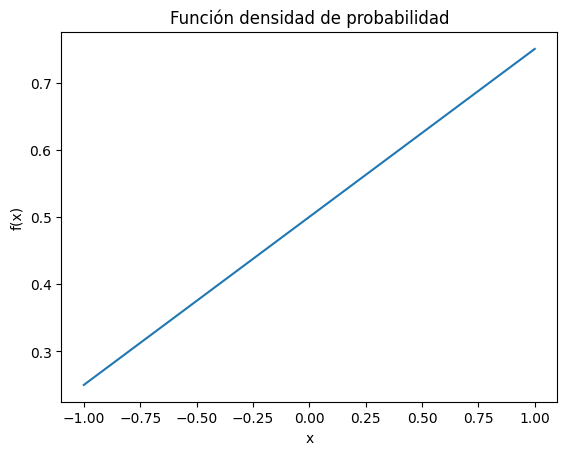

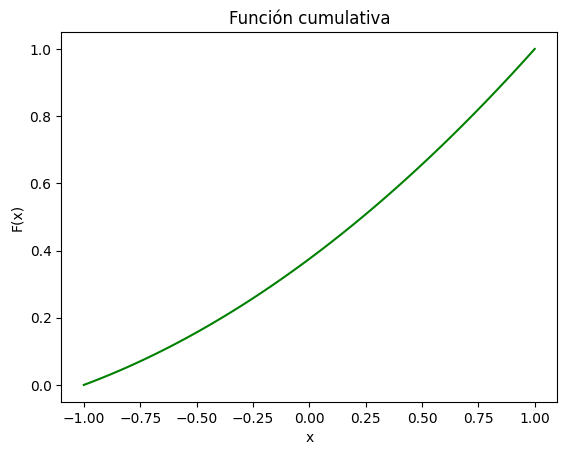

In [ ]:
# Importa las librerias numpy y matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 0.5 * (1+0.5*x) # función que usaremos para evaluar f(x) o bien usando def
Fcum = lambda x: ((x*x)/8+x/2+3/8) # función que usaremos para evaluar F(x) o bien usando def

x = np.linspace(-1, 1, 100) # Array de puntos en x para evaluar f(x) y F(x) entre -1 y 1

plt.plot(x,f(x),'-')
plt.title("Función densidad de probabilidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x,Fcum(x),'g-')
plt.title("Función cumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### <font color='orange'>**> Python #2**</font>

Genera N=1000000 números uniformemente distribuidos entre 0 y 1. Usa el método de transformación para generar un número N de $x$ aleatorios que estén distribuidos de acuerdo con $f(x)$ entre -1 y 1. 

Haz un histograma normalizado de estos valores de $x$ y añade la función $f(x)$ en la gráfica. **[4 punts]**

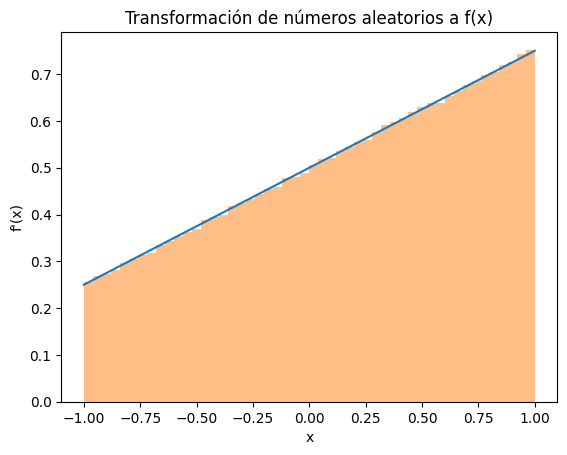

In [ ]:
N = 1000000 # Número de puntos a generar

xunif = np.random.uniform(0,1,N)

def ft(x): # función transf. usando def
  return np.sqrt(8 * x + 1) - 2

xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

x = np.linspace(-1, 1, 100) # Array de puntos en x para evaluar f(x) y F(x) entre -1 y 1
plt.plot(x,f(x),'-')

plt.hist(xt, bins=50, alpha=0.5, density=True) # voilà!
plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

### <font color='orange'>**> Python #3**</font>

Ahora vamos a generar un número N de valores (${X_1, ..., X_n}$) que sigan esta distribución y evaluaremos el estimador $\hat{\theta}=3\bar{x}$. Para calcular como evoluciona la varianza de este estimador respecto a $N$, tendremos que generar $Z$ valores de $\hat{\theta}$ para cada $N$ que consideremos, y evaluar la varianza de este conjunto de $Z$ valores de $3\bar{x}$, para cada $N$!

Tendrás que hacer dos bucles for. Unas pistas:

1) Un bucle para hacer variar N de 10 a 10000, en pasos de 10 (10,20,30,...)

2) Otro bucle para cada valor de N del bucle anterior y calcula Z=100 valores del estimador $\hat{\theta}$

3) Calcula la varianza de estos 100 valores de $\hat{\theta}$ para cada N (puedes usar la función var() de numpy). Vamos a llamar a este valor var($\hat{\theta}$)$_n$.

4) Haz la gráfica de var($\hat{\theta}$)$_n$ vs. N, y ve como tiende a cero cuando N crece.

**[3 punts]**

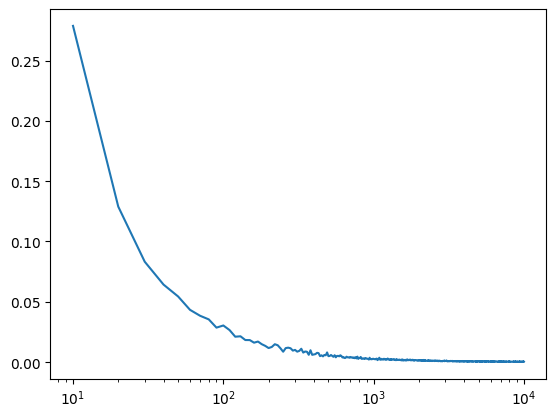

In [ ]:
n=[]
estt = []


for N in np.arange(10,10000,10):
  est = []
  for v in range(1,100):
    xunif = np.random.uniform(0,1,N)
    xt = ft(xunif)
    est.append(3*np.mean(xt))
  n.append(N)
  estt.append(np.var(est))

plt.xscale('log')
plt.plot(n,estt)
plt.show()

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr3_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr3_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>